In [2]:
# Import numerical calculation library
import numpy as np
from numpy import pi

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, assemble, transpile, execute, QuantumRegister, ClassicalRegister

# import basic plot tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector

F:\ProgramFiles\Anaconda\envs\quantum_computing\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


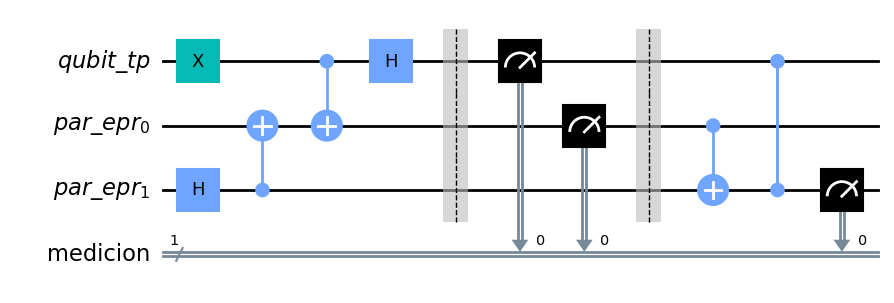

In [3]:
qubit_tp = QuantumRegister(1, name='qubit_tp')
qubits_epr = QuantumRegister(2, name='par_epr')
bits_clasicos = ClassicalRegister(1, name='medicion')
circuito = QuantumCircuit(qubit_tp, qubits_epr, bits_clasicos) 

circuito.x(0) 
circuito.h(2) 
circuito.cx(2,1)
circuito.cx(0,1)
circuito.h(0)
circuito.barrier()
circuito.measure([0,1],[0,0])
circuito.barrier()
circuito.cx(1,2)
circuito.cz(0,2)
circuito.measure(2,0)

circuito.draw('mpl')

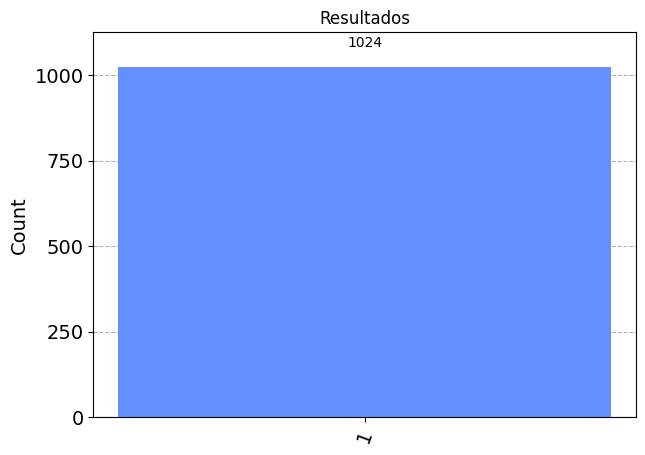

In [4]:
# Obtenemos el simulador donde ejecutar el circuito
simulator = Aer.get_backend('aer_simulator', method = 'statevector', device = 'gpu')
# Transpilamos el circuito
circuito_transpiled = transpile(circuito, simulator)
# Ejecutamos el circuito
result = simulator.run(circuito_transpiled).result()
# Obtenemos los resultados
counts = result.get_counts(circuito_transpiled)
# Pintamos los resultados obtenidos en un histograma
plot_histogram(counts, title='Resultados')

In [5]:
# Ejecucion en ordenador cuantico real
from qiskit import IBMQ
from qiskit import QuantumCircuit, transpile, assemble, execute
from qiskit.tools.monitor import job_monitor

clave_sesion = 'a03637c1929511e276705a72ca1dc33436e2ce4c888dcaa04eda8f6783fdcab3d2d9ff26abd9fcbafbae21bf5ebcb6b432443b17b2dcc34b894b93a1c8f35d4c',overwrite=True

ibmqfactory.load_account:WARNING:2024-06-18 12:47:14,164: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
# Iniciamos sesión
IBMQ.save_account(clave_sesion)
IBMQ.load_account()

In [8]:
# Indicamos el dispositivo a usar
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibm_osaka')
# Transpilamos el circuito al ordenador cuántico
transpiled_qc = transpile(circuito, backend)

In [9]:
# Crear el objeto de trabajo (job) y ejecutarlo
job = execute(transpiled_qc, backend, shots=1000)

# Monitorear el trabajo
job_monitor(job)

Job Status: job has successfully run
